# Projeto - Análise do preço das casas de São Paulo

### Autor: Guilherme Iram
### Fonte dos dados: https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo



# Informações sobre o dataset
- Street (Rua) - Localização da rua a qual a casa pertence
- City (Cidade) - Cidade que a casa está localizada
- Propertycard__detailvalue (Área) - Área em metros quadrados da casa
- Quartos (Quartos) - Número de quartos da casa
- Banheiros (Banheiros) - Número de banheiros da casa
- Vagas (Vagas) - Vagas de estacionamento por veículo
- Price (Custo) - Preço da casa em BRL (real brasileiro)

## Objetivos da análises:
- Baseado nas características quantitativas do dataset, fazer uma análise visual desses atributos e propor um modelo de regressão.
- Sugerir uma previsão do preço da casa baseado nas características desejadas pelo cliente.

## 1 - Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2 - Carregando o dataset, tratamento & análises prévias

In [2]:
df_sp = pd.read_excel("./dados/SaoPaulo.xlsx")

In [3]:
df_sp.head()

,Street,City,propertycard__detailvalue,quartos,banheiros,vagas,price
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",469-524,3-6,3-6,4,R$ 3.700.000
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,R$ 380.000
3,"Jardim Morumbi, São Paulo",SP,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,R$ 540.000


In [4]:
dict_rename = {'Street': 'rua',
              'City': 'cidade',
              'propertycard__detailvalue': 'area_metro_quadrado',
              'quartos': 'quartos',
              'banheiros': 'banheiros',
              'vagas': 'vagas',
              'price': 'preco'}
df_sp.rename(columns=dict_rename, inplace=True)

In [5]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10033 entries, 0 to 10032
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rua                  10033 non-null  object
 1   cidade               10033 non-null  object
 2   area_metro_quadrado  10033 non-null  object
 3   quartos              10033 non-null  object
 4   banheiros            10033 non-null  object
 5   vagas                10033 non-null  object
 6   preco                10033 non-null  object
dtypes: object(7)
memory usage: 548.8+ KB


 - Necessidade de efetuar limpesa e tratamento de dados 
 - Limpar valores quantitativos, como os metros quadrados, número de quartos, banheiros e remover o cifrão do preço
 - Sem dados faltantes

## 3 - Limpeza dos dados

### 3.1 - Tratando a coluna 'preco'

In [6]:
def trata_valores_cifrao(x):
    try:
        for i in range(len(x)):

            aux[i, 0] = (x[i, 0].split()[1])
            aux[i, 0] = x[i, 0].split('.')
            _ = aux[i, 0].copy()
            aux[i, 0] = ''

            for c in _:
                x[i, 0] += c
            x[i, 0] = float(x[i, 0])
    except:
        print("Valor já tratado!")
    return aux

In [7]:
df_sp["preco"].unique()

array(['R$ 7.000.000', 'R$ 3.700.000', 'R$ 380.000', ..., 'R$ 553.000',
       'R$ 951.000', 'R$ 2.200\n                      /Mês'], dtype=object)

In [8]:
aux = df_sp.loc[:, "preco"]
aux = np.array(aux)
aux = aux.reshape([-1, 1])

df_sp.loc[:, "preco"] = trata_valores_cifrao(aux)

### 3.2 - Tratando a coluna 'area_metro_quadrado'

- Aqui será feito uma convenção, para todos os valores no formato 'x-y', será usado o y para substituir a expressão.
- Isso vale pras demais colunas.

In [9]:
df_sp["area_metro_quadrado"].unique()[:10]

array(['1000', '469-524', '125', '310', '100', '440', '145', '150',
       '46-50', '114'], dtype=object)

In [10]:
def trata_valores_inteiros(x):
    try:
        for i in range(len(x)):
            x[i, 0] = x[i, 0].split('-')

            if len(x[i, 0]) == 2:
                x[i, 0] = x[i, 0][1] 
            _ = x[i, 0]
            aux[i, 0] = ''

            for c in _:
                x[i, 0] += c
            aux[i, 0] = int(x[i, 0])
    except:
         print("Valor já tratado!")
    return aux

In [11]:
aux = df_sp.loc[:, "area_metro_quadrado"]
aux = np.array(aux)
aux = aux.reshape([-1, 1])

df_sp.loc[:, "area_metro_quadrado"] = trata_valores_inteiros(aux)

### 3.3 - Tratando a coluna 'quartos'

In [12]:
df_sp["quartos"].unique()

array(['4', '3-6', '3', '2', '7', '2-3', '5', '6', '1', '8', '11', '10',
       '9', '13', '12', '15', '16'], dtype=object)

In [13]:
aux = df_sp.loc[:, "quartos"]
aux = np.array(aux)
aux = aux.reshape([-1, 1])

df_sp.loc[:, "quartos"] = trata_valores_inteiros(aux)

### 3.4 - Tratando a coluna 'banheiros'

In [14]:
df_sp["banheiros"].unique()

array(['8', '3-6', '3', '2', '4', '1', '5', '7', '6', '9', '10', '11',
       '12', '40', '14', '16'], dtype=object)

In [15]:
aux = df_sp.loc[:, "banheiros"]
aux = np.array(aux)
aux = aux.reshape([-1, 1])

df_sp.loc[:, "banheiros"] = trata_valores_inteiros(aux)

### 3.5 - Tratando a coluna 'vagas'

In [16]:
df_sp["vagas"].unique()

array(['6', '4', '2', '1', '3', '5', '1-2', '8', '7', '10', '12', '9',
       '20', '13', '15', '25', '14', '18', '11', '38', '30', '26', '24',
       '16', '42', '34', '23', '40', '50'], dtype=object)

In [17]:
aux = df_sp.loc[:, "vagas"]
aux = np.array(aux)
aux = aux.reshape([-1, 1])

df_sp.loc[:, "vagas"] = trata_valores_inteiros(aux)

### 3.6 - Cotemplando as mudanças & salvando novo xlsx

In [18]:
df_sp.head(15)

,rua,cidade,area_metro_quadrado,quartos,banheiros,vagas,preco
0,"Avenida Itacira, 255","Planalto Paulista, São Paulo",1000,4,8,6,7000000.0
1,"Rua Aurelia Perez Alvarez, 42","Jardim dos Estados, São Paulo",524,6,6,4,3700000.0
2,Rua Alba Valdez,"Jardim Reimberg, São Paulo",125,4,3,2,380000.0
3,"Jardim Morumbi, São Paulo",SP,310,3,2,4,685000.0
4,"Rua Tobias Barreto, 195","Mooca, São Paulo",100,3,2,2,540000.0
5,Rua Graham Bell,"Santo Amaro, São Paulo",440,4,4,6,1980000.0
6,"Rua Francisco Paulo, 31","Cidade Mãe do Céu, São Paulo",145,4,4,2,850000.0
7,"Rua Guilherme Valente, 150","Jardim Vergueiro, São Paulo",150,2,2,2,450000.0
8,"Rua Sagrada Família, 8","Jardim Benfica, São Paulo",50,2,1,1,199900.0
9,Rua Tapaji,"Vila Alpina, São Paulo",114,3,3,2,585000.0


In [19]:
df_sp.to_csv("./dados/SaoPauloClean.csv")

## 4 - Estatística descritiva dos dados

### 4.1 - Medidas de centralidade e dispersão da area, quartos, banheiro, vagas e preco

In [20]:
def gera_medidas_estatisticas(df, coluna):
    medidas = {
        "media": round(st.mean(df[coluna]), 2),
        "moda": round(st.mode(df[coluna]), 2),
        "mediana": round(st.median(df[coluna]), 2),
        "variancia": round(st.variance(df[coluna]), 2),
        "desvio padrao": round(st.stdev(df[coluna]), 2)}
    return medidas

In [21]:
dict_medidas_estatisticas = {"area_metro_quadrado": gera_medidas_estatisticas(df_sp, "area_metro_quadrado"),
                            "quartos": gera_medidas_estatisticas(df_sp, "quartos"),
                            "banheiros": gera_medidas_estatisticas(df_sp, "banheiros"),
                            "vagas": gera_medidas_estatisticas(df_sp, "vagas"),
                            "preco": gera_medidas_estatisticas(df_sp, "preco")}

tabela_dados = pd.DataFrame(dict_medidas_estatisticas).T
tabela_dados

,media,moda,mediana,variancia,desvio padrao
area_metro_quadrado,440.40,300.0,288.0,5.634057e+07,7506.04
quartos,3.48,3.0,3.0,1.130000e+00,1.06
banheiros,3.88,3.0,4.0,3.960000e+00,1.99
vagas,4.09,2.0,4.0,7.970000e+00,2.82
preco,2790788.42,2500000.0,1600000.0,1.492057e+13,3862715.76


 - É notável que a coluna 'area_metro_quadrado' e 'preco' possuem um desvio muito notável, sendo a coluna da área o mais.
 - Logo, deve-se verificar e tratar a existência desses 'outliers' para dar prosseguimento a análise dos dados.

### 4.2 - Tratamento das variáveis com alto desvio

### 4.3 - Vizualização das variáveis

In [22]:
sns.set_style("darkgrid")
sns.set(style="whitegrid")

def grafico_de_barras(df, coluna, limit=0):
    
    dataCount =  df[coluna].value_counts()
    values = dataCount.values
    label = np.array(dataCount.index)
    
    if len(label) > limit and limit != 0:
        label = label[:limit + 1]
        values = values[:limit + 1]
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Gráfico de barra da coluna '{coluna}'", fontsize=20)
    plt.xlabel(f"Classes de '{coluna}'", fontsize=16)
    plt.ylabel("Frequência", fontsize=16)
    sns.barplot(y=values, x=label, palette='deep')
    plt.show()

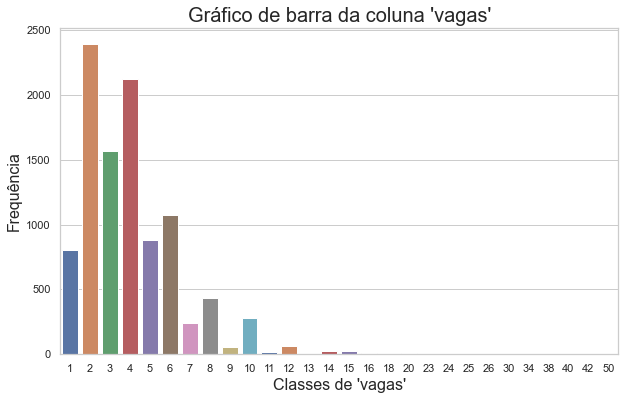

In [23]:
grafico_de_barras(df_sp, "vagas")

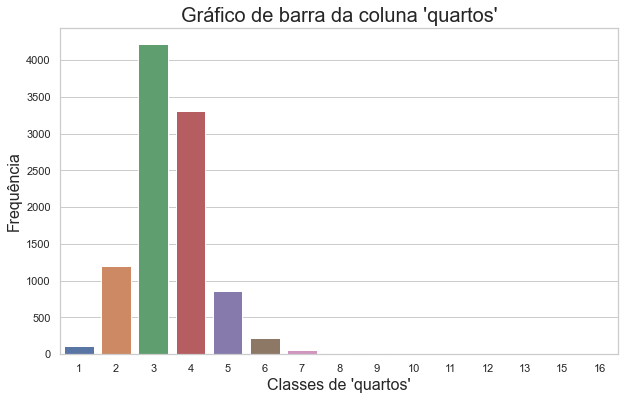

In [24]:
grafico_de_barras(df_sp, "quartos")

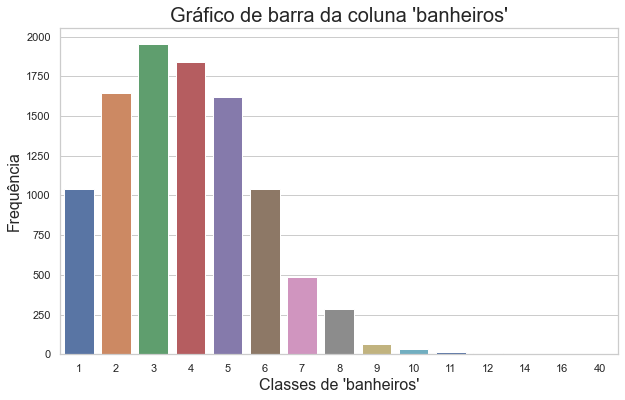

In [25]:
grafico_de_barras(df_sp, "banheiros")